In [1]:
import pandas as pd

In [2]:
import pandas as pd

# 데이터 파일 경로 설정
file_path = "../data/adl_fall_all.csv"

# CSV 파일을 DataFrame으로 읽어오기
df = pd.read_csv(file_path)

# head 출력
df.head()

,No,Heartbeat,Temperature,Spo2,UserCode,GyroX,GyroY,GyroZ,Label
0,1,67,36.6,95,33,-0.040861,4.985047,6.510526,Downstairs
1,2,60,36.7,99,33,-0.463092,4.372132,7.436710,Downstairs
2,3,79,36.6,98,33,-0.299648,4.603678,6.510526,Downstairs
3,4,69,36.6,97,33,-0.272407,4.481094,6.360703,Downstairs
4,5,65,36.6,98,33,-1.525479,5.175732,7.164303,Downstairs


In [3]:
# 결측치 확인
df.isnull().sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [4]:
# 값이 0인 결측치 찾기
df.eq(0).sum()

No                 0
Heartbeat          0
Temperature        0
Spo2               0
UserCode           0
GyroX          16282
GyroY          13942
GyroZ          17354
Label              0
dtype: int64

In [5]:
# 결측치가 삭제된 DataFrame 생성
df_cleaned = df[~(df.eq(0).sum(axis=1) > 0)]

# 결과 확인
print(df_cleaned)

              No  Heartbeat  Temperature  Spo2  UserCode     GyroX     GyroY   
0              1         67         36.6    95        33 -0.040861  4.985047  \
1              2         60         36.7    99        33 -0.463092  4.372132   
2              3         79         36.6    98        33 -0.299648  4.603678   
3              4         69         36.6    97        33 -0.272407  4.481094   
4              5         65         36.6    98        33 -1.525479  5.175732   
...          ...        ...          ...   ...       ...       ...       ...   
1026364  1026365        132         36.0    98        36 -4.370000 -2.260000   
1026365  1026366         50         34.4    95        36 -4.370000 -2.220000   
1026366  1026367         51         34.9    98        36 -4.370000 -2.220000   
1026367  1026368        138         37.1    97        36 -5.430000 -2.180000   
1026368  1026369         51         34.2    97        36 -4.400000 -2.260000   

            GyroZ       Label  
0      

In [6]:
# 값이 0인 요소 찾기
df_cleaned.eq(0).sum()

No             0
Heartbeat      0
Temperature    0
Spo2           0
UserCode       0
GyroX          0
GyroY          0
GyroZ          0
Label          0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

# 특성과 타겟 데이터로 분할
X = df[['Temperature','Heartbeat','GyroX','GyroY','GyroZ']]
y = df['Label']

# 테스트 세트와 트레인 세트로 분할 (70% 트레인, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# 결과 확인
print("X_train:")
print(X_train)
print("y_train:")
print(y_train)
print("X_test:")
print(X_test)
print("y_test:")
print(y_test)

X_train:
        Temperature  Heartbeat  GyroX  GyroY     GyroZ
207645         36.7         77   7.27  -0.53  3.568531
838364         36.7         71  -3.98   4.56 -2.220000
252974         36.7         81 -15.60  14.75  4.180000
733843         36.6         71  13.72   1.42  0.885323
595271         36.7         72   0.50  14.82 -1.307553
...             ...        ...    ...    ...       ...
759363         36.7         82   2.83  16.97  5.790000
535030         36.6         63  -9.30   2.22  0.760000
573977         36.7         66  -0.15  12.22 -4.520000
189636         36.7         85  -8.43  15.40 -0.994285
585903         36.8         76   4.06   4.56 -2.960000

[718458 rows x 5 columns]
y_train:
207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object
X_test:
        Temperature  Heartbeat  Gyr

In [8]:
import joblib
from sklearn.preprocessing import StandardScaler

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

joblib.dump(scaler, '../model/scaler.pkl')

['../model/scaler.pkl']

In [9]:
# 독립변수, 종속변수 설정
X = X_train
y = y_train
print("독립변수 X : ", X)
print("종속변수 Y : ", y)

독립변수 X :  [[ 0.01745096  0.419339    0.95269928 -1.19305892  0.70173135]
 [ 0.01745096 -0.22317402 -0.70726965 -0.4351097  -0.52876374]
 [ 0.01745096  0.84768102 -2.42183311  1.08227785  0.83171417]
 ...
 [ 0.01745096 -0.75860154 -0.14214245  0.70553688 -1.01768549]
 [ 0.01745096  1.27602303 -1.36387958  1.17906901 -0.26820786]
 [ 0.40566577  0.3122535   0.47905481 -0.4351097  -0.686069  ]]
종속변수 Y :  207645     Jogging
838364     Walking
252974     Jogging
733843     Walking
595271     Walking
            ...   
759363     Walking
535030    Upstairs
573977    Upstairs
189636     Jogging
585903    Upstairs
Name: Label, Length: 718458, dtype: object


독립변수 : 체온, 맥박, 자이로스코프 x,y,z축
종속변수 : 활동 레이블

선형 모델을 기반으로 한 모델 생성

In [10]:
from matplotlib import pyplot as plt
from sklearn import metrics

kernal_evals = dict() # 모델 평가 결과를 저장할 딕셔너리

# 모델을 평가, 결과를 출력, kernal_evals 딕셔너리에 저장
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall,
                               test_recall]
    print(f"Training Accuracy {name} is {train_accuracy * 100},  Test Accuracy {name} is {test_accuracy * 100}")
    print(f"Training Precesion {name} is {train_precision * 100},  Test Accuracy {name} is {test_precision * 100}")
    print(f"Training Recall {name} is {train_recall * 100},  Test Accuracy {name} is {test_recall * 100}")

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=['LAYING', 'FALL', 'STANDING', 'WALKING',
                                                                'DOWNSTAIRS', 'UPSTAIRS'])
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Logistic Regression is 48.90752138607964,  Test Accuracy Logistic Regression is 49.00149718587514
Training Precesion Logistic Regression is 48.90752138607964,  Test Accuracy Logistic Regression is 49.00149718587514
Training Recall Logistic Regression is 48.90752138607964,  Test Accuracy Logistic Regression is 49.00149718587514


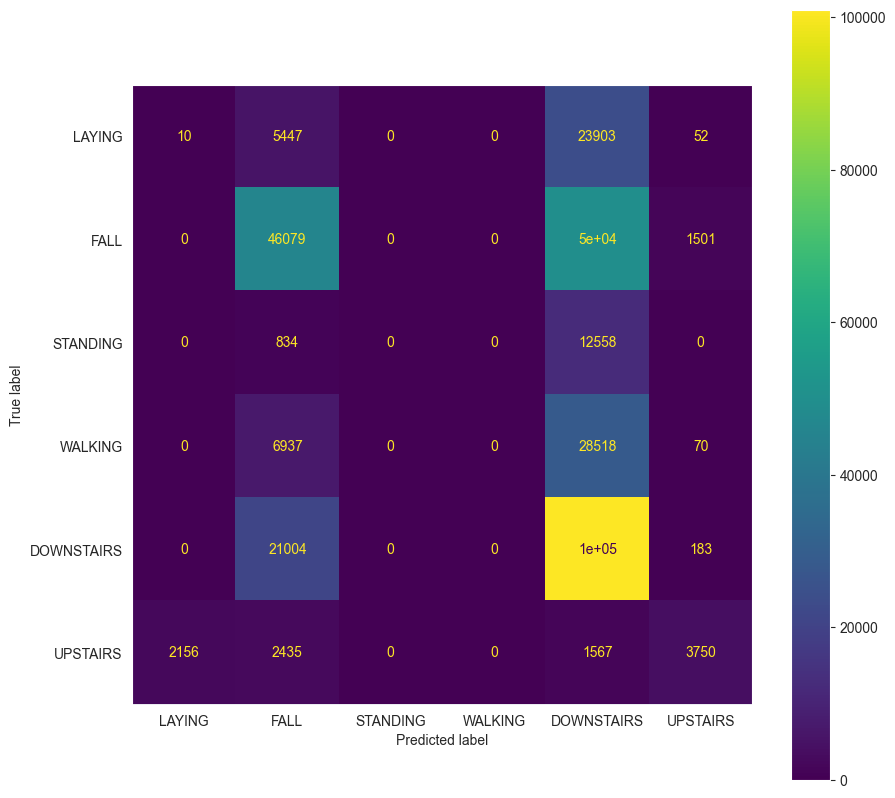

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)

Training Accuracy LinearDiscriminantAnalysis is 49.48653922706686,  Test Accuracy LinearDiscriminantAnalysis is 49.56562123470743
Training Precesion LinearDiscriminantAnalysis is 49.48653922706686,  Test Accuracy LinearDiscriminantAnalysis is 49.56562123470743
Training Recall LinearDiscriminantAnalysis is 49.48653922706686,  Test Accuracy LinearDiscriminantAnalysis is 49.56562123470743


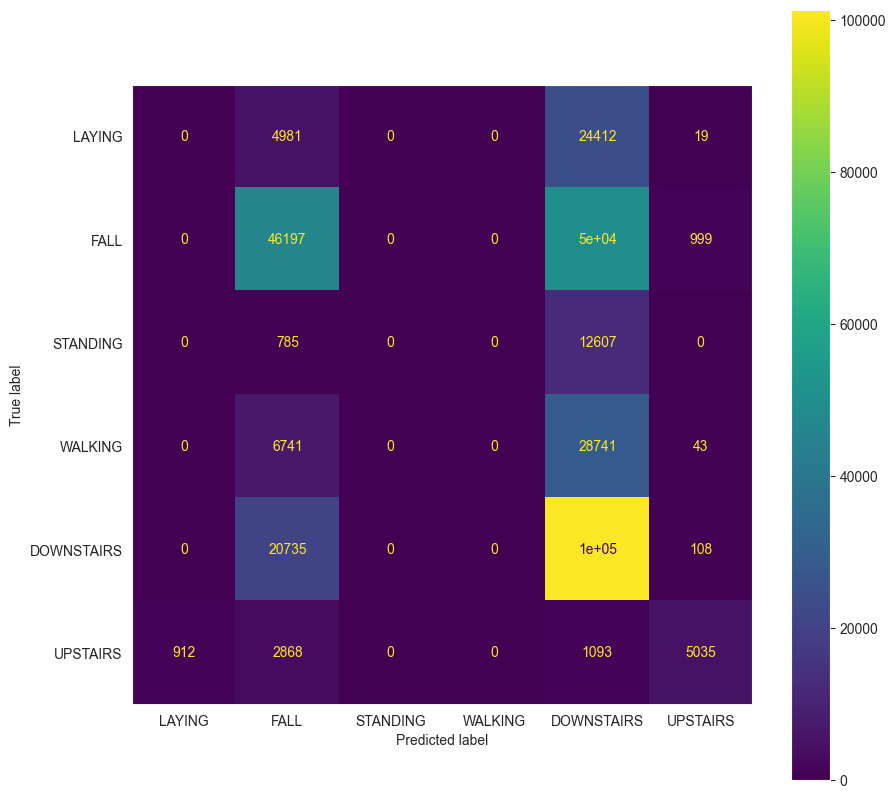

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", X_train, X_test, y_train, y_test)

In [13]:
import pandas as pd

# 판다스 Series로 변환
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

Training Accuracy KNeighborsClassifier is 65.62861016231986,  Test Accuracy KNeighborsClassifier is 63.92788825342388
Training Precesion KNeighborsClassifier is 65.62861016231986,  Test Accuracy KNeighborsClassifier is 63.92788825342388
Training Recall KNeighborsClassifier is 65.62861016231986,  Test Accuracy KNeighborsClassifier is 63.92788825342388


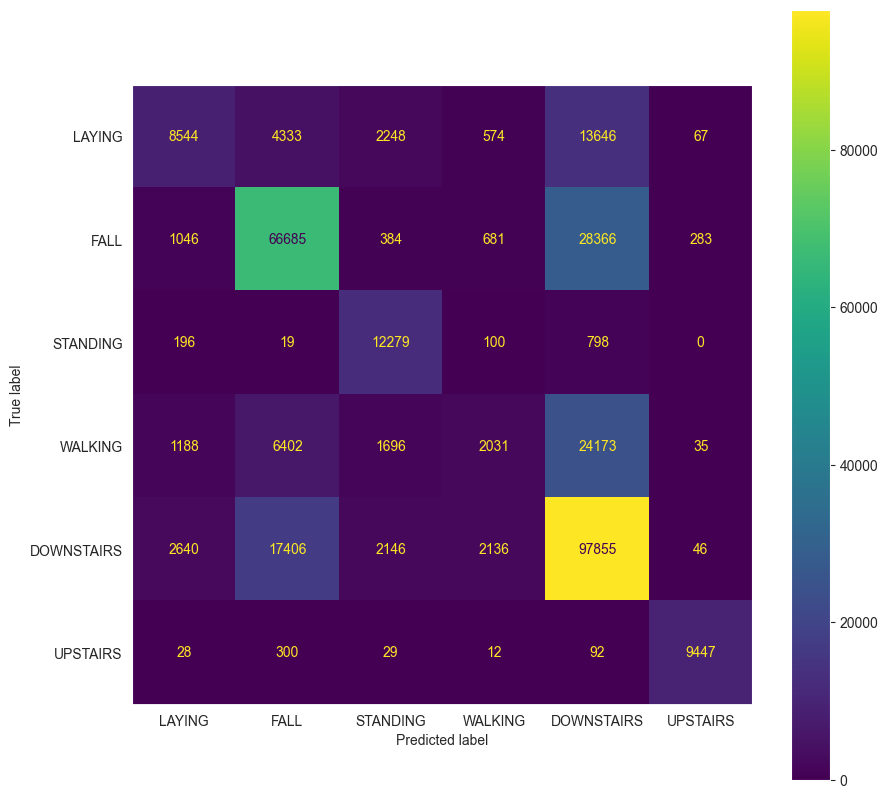

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30).fit(X_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", X_train, X_test, y_train, y_test)

Training Accuracy GaussianNB is 58.1307466824783,  Test Accuracy GaussianNB is 58.22234346937913
Training Precesion GaussianNB is 58.1307466824783,  Test Accuracy GaussianNB is 58.22234346937913
Training Recall GaussianNB is 58.1307466824783,  Test Accuracy GaussianNB is 58.22234346937913


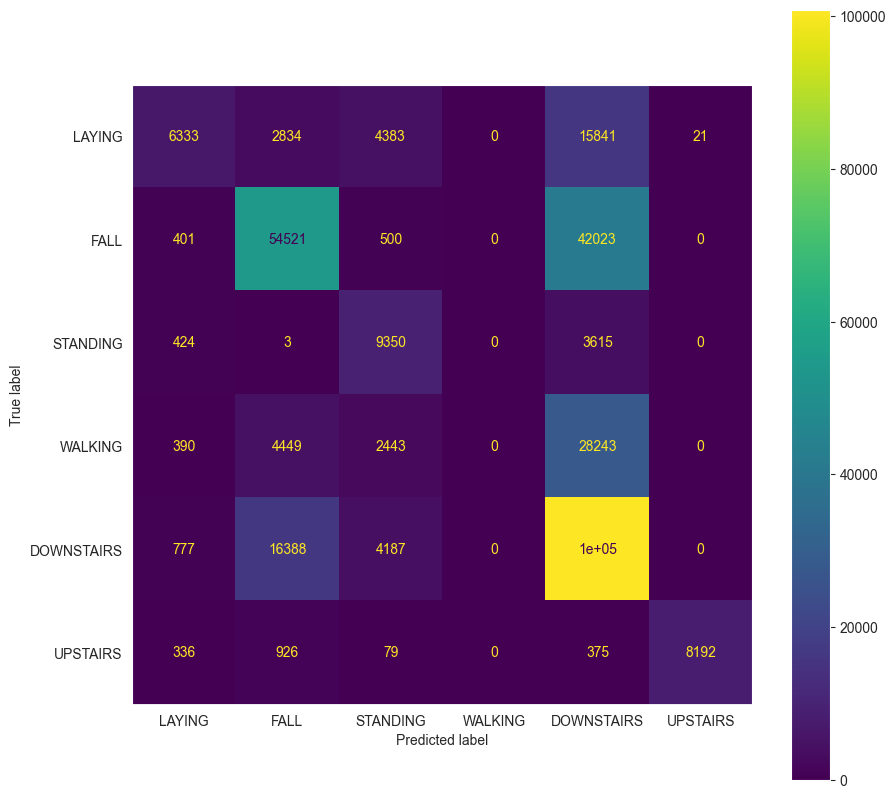

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
evaluate_classification(gnb, "GaussianNB", X_train, X_test, y_train, y_test)

D:\Danu\Project\venv2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) is 49.303369160062246,  Test Accuracy Linear SVC(LBasedImpl) is 49.34705158308732
Training Precesion Linear SVC(LBasedImpl) is 49.303369160062246,  Test Accuracy Linear SVC(LBasedImpl) is 49.34705158308732
Training Recall Linear SVC(LBasedImpl) is 49.303369160062246,  Test Accuracy Linear SVC(LBasedImpl) is 49.34705158308732


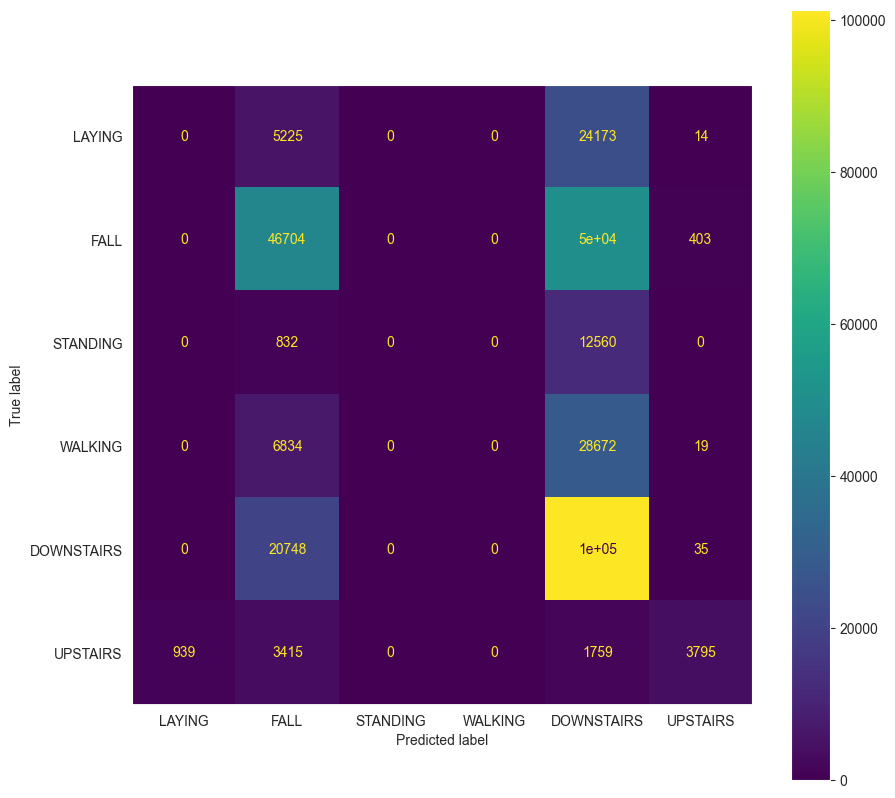

In [16]:
from sklearn import svm

lin_svc = svm.LinearSVC().fit(X_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", X_train, X_test, y_train, y_test)

Training Accuracy XGBClassifier is 65.81943551327983,  Test Accuracy XGBClassifier is 65.48678027092244
Training Precesion XGBClassifier is 65.81943551327983,  Test Accuracy XGBClassifier is 65.48678027092244
Training Recall XGBClassifier is 65.81943551327983,  Test Accuracy XGBClassifier is 65.48678027092244


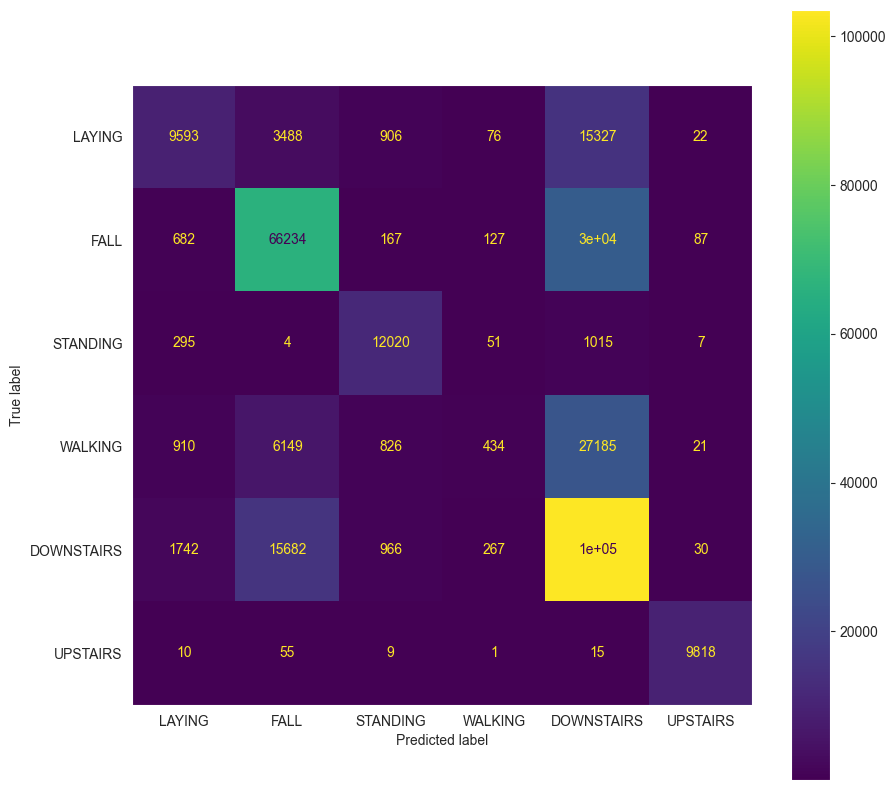

In [11]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb = XGBClassifier().fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)

Training Accuracy XGBClassifier is 64.90024469071261,  Test Accuracy XGBClassifier is 64.82100347178243
Training Precesion XGBClassifier is 64.90024469071261,  Test Accuracy XGBClassifier is 64.82100347178243
Training Recall XGBClassifier is 64.90024469071261,  Test Accuracy XGBClassifier is 64.82100347178243


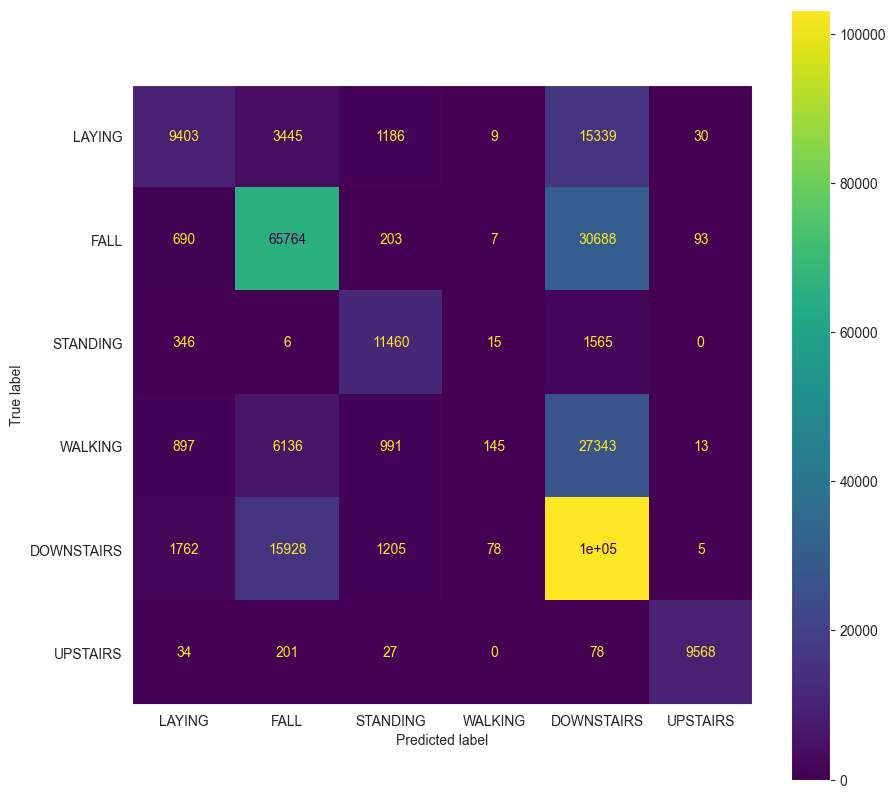

In [12]:
from sklearn import preprocessing
from xgboost import XGBClassifier

le = preprocessing.LabelEncoder().fit(y_train)
y_xgb_train = le.transform(y_train)
y_xgb_test = le.transform(y_test)
xgb_params = {'n_estimators': 100,
              'learning_rate': 0.2,
              'subsample': 0.927,
              'colsample_bytree': 0.88,
              'max_depth': 5,
              'booster': 'gbtree',
              'reg_lambda': 38,
              'reg_alpha': 32,
              'random_state': 12}
xgb = XGBClassifier(**xgb_params).fit(X_train, y_xgb_train)
evaluate_classification(xgb, "XGBClassifier", X_train, X_test, y_xgb_train, y_xgb_test)

In [ ]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
evaluate_classification(rbf, "RBF SVC", X_train, X_test, y_train, y_test)